# The dataset: 
This dataset was created by the Reporters United team (which I am part of) 
for the purposes of a two-part investigation: 
Part 1: https://www.reportersunited.gr/12587/kokkinia-daneia-pillar-eurobank/
The dataset can be found here: 
https://docs.google.com/spreadsheets/d/1cKs3ohi3u7KOwbuqIXuTTaBjZv2A4PSZFQswlH1r8tE/edit?gid=1386900784#gid=1386900784

Unfortunately, the dataset is in Greek, 
we hope that an English version is soon to follow.

# The analysis: 

In [3]:
import pandas as pd 
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv("Data.csv", na_values='-')
df.head()

,πληροφορίες,ημνία_πλειστηριασμού,μοναδικός_κωδικός,τύπος_ακινήτου,περιφέρεια,δήμος,επιφάνεια,όροφος,έτος_κατασκευής,κατάσταση_πλειστηριασμού,τιμή_εκκίνησης (€),ακρίβεια_τοποθεσίας,latitude,longitude
0,https://www.eauction.gr/Auction/Details/410hb6...,25/09/2019,BOma23Tmo4,Κατοικία,Στερεάς Ελλάδας,Διρφύων - Μεσσαπίων,156.28,NaN,2004.0,Ολοκληρωμένος,145340,όχι,38.458249,23.595539
1,https://www.eauction.gr/Auction/Details/d3dc__...,20/11/2019,qpobGQmNjt,Κατοικία,Αττικής,Πειραιώς,99.50,1ος,1993.0,Ολοκληρωμένος,144327,ναι,37.946301,23.667726
2,https://www.eauction.gr/Auction/Details/0_26d_...,01/11/2019,hYC0ZyUyhx-001,Οικόπεδο,Νοτίου Αιγαίου,Καλυμνίων,271.78,NaN,NaN,Ματαιωμένος,22000,όχι,36.214529,28.116926
3,https://www.eauction.gr/Auction/Details/0f356i...,01/11/2019,hYC0ZyUyhx-002,Οικόπεδο,Νοτίου Αιγαίου,Καλυμνίων,269.28,NaN,NaN,Ματαιωμένος,22000,όχι,36.214529,28.116926
4,https://www.eauction.gr/Auction/Details/1b4610...,01/11/2019,hYC0ZyUyhx-003,Οικόπεδο,Νοτίου Αιγαίου,Καλυμνίων,284.92,NaN,NaN,Ματαιωμένος,22000,όχι,36.214529,28.116926


# Counting the property types for the whole portfolio:

In [5]:
df["τύπος_ακινήτου"].value_counts()

τύπος_ακινήτου
Κατοικία                            2339
Αποθήκη                              237
Επαγγελματικοί Χώροι                 186
Οικόπεδο                             122
Θέση Στάθμευσης                       81
Αγροτεμάχιο με κτίσμα                 73
Αγροτεμάχιο                           55
Βιομηχανικός - Βιοτεχνικός Χώρος       4
Ξενοδοχείο                             2
Name: count, dtype: int64

In [6]:
df["τύπος_ακινήτου"].value_counts(normalize=True)

τύπος_ακινήτου
Κατοικία                            0.754760
Αποθήκη                             0.076476
Επαγγελματικοί Χώροι                0.060019
Οικόπεδο                            0.039368
Θέση Στάθμευσης                     0.026137
Αγροτεμάχιο με κτίσμα               0.023556
Αγροτεμάχιο                         0.017748
Βιομηχανικός - Βιοτεχνικός Χώρος    0.001291
Ξενοδοχείο                          0.000645
Name: proportion, dtype: float64

# Creating a new dataframe that contains only the properties in Attica region.

In [7]:
df_Attiki = df[df["περιφέρεια"] == "Αττικής"]
df_Attiki.head()

,πληροφορίες,ημνία_πλειστηριασμού,μοναδικός_κωδικός,τύπος_ακινήτου,περιφέρεια,δήμος,επιφάνεια,όροφος,έτος_κατασκευής,κατάσταση_πλειστηριασμού,τιμή_εκκίνησης (€),ακρίβεια_τοποθεσίας,latitude,longitude
1,https://www.eauction.gr/Auction/Details/d3dc__...,20/11/2019,qpobGQmNjt,Κατοικία,Αττικής,Πειραιώς,99.5,1ος,1993.0,Ολοκληρωμένος,144327,ναι,37.946301,23.667726
6,https://www.eauction.gr/Auction/Details/4i7jb2...,18/12/2019,Oe6tefN9u6-001,Κατοικία,Αττικής,Χαϊδαρίου,84.5,4ος,1985.0,Ματαιωμένος,103323,ναι,38.016225,23.649152
7,https://www.eauction.gr/Auction/Details/a6aib7...,18/12/2019,Oe6tefN9u6-002,Αποθήκη,Αττικής,Χαϊδαρίου,3.6,Υπόγειο,1985.0,Ματαιωμένος,3000,ναι,38.016225,23.649152
8,https://www.eauction.gr/Auction/Details/3cba_6...,18/12/2019,Oe6tefN9u6-003,Κατοικία,Αττικής,Χαϊδαρίου,116.0,4ος,1985.0,Ματαιωμένος,141933,ναι,38.016225,23.649152
9,https://www.eauction.gr/Auction/Details/aaa_17...,18/12/2019,Oe6tefN9u6-004,Αποθήκη,Αττικής,Χαϊδαρίου,3.6,Υπόγειο,1985.0,Ματαιωμένος,3000,ναι,38.016225,23.649152


In [8]:
df_Attiki.to_csv("Data_Attiki.csv", index=False)

# Counting and plotting the property types for the Attica region:

In [9]:
types = df_Attiki["τύπος_ακινήτου"].value_counts()
types

τύπος_ακινήτου
Κατοικία                            1076
Αποθήκη                              175
Επαγγελματικοί Χώροι                  89
Θέση Στάθμευσης                       67
Οικόπεδο                              28
Αγροτεμάχιο με κτίσμα                 16
Αγροτεμάχιο                            4
Βιομηχανικός - Βιοτεχνικός Χώρος       1
Name: count, dtype: int64

In [10]:
df_Attiki["τύπος_ακινήτου"].value_counts(normalize=True)

τύπος_ακινήτου
Κατοικία                            0.739011
Αποθήκη                             0.120192
Επαγγελματικοί Χώροι                0.061126
Θέση Στάθμευσης                     0.046016
Οικόπεδο                            0.019231
Αγροτεμάχιο με κτίσμα               0.010989
Αγροτεμάχιο                         0.002747
Βιομηχανικός - Βιοτεχνικός Χώρος    0.000687
Name: proportion, dtype: float64

<Axes: ylabel='τύπος_ακινήτου'>

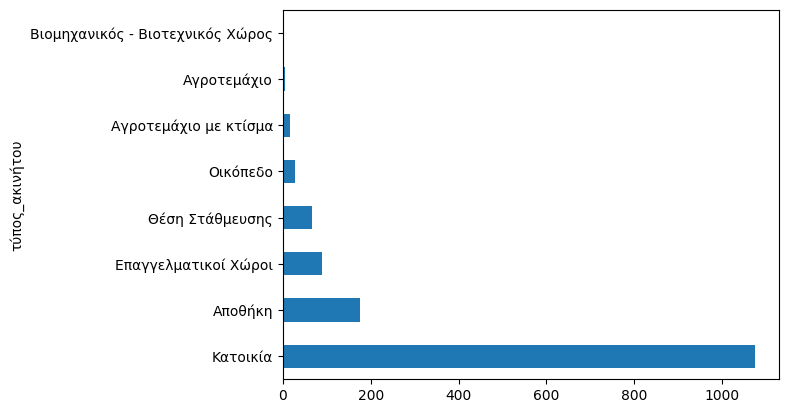

In [11]:
types.plot.barh()

# Looking into the distribution of auctions within Attica's municipalities

In [12]:
municipality = df_Attiki["δήμος"].value_counts()
municipality

δήμος
Αθηναίων                         340
Πειραιώς                         121
Νικαίας - Αγίου Ιωάννου Ρέντη     71
Κερατσινίου - Δραπετσώνας         50
Αχαρνών                           50
                                ... 
Ραφήνας - Πικερμίου                3
Φιλοθέης - Ψυχικού                 3
Μαραθώνος                          2
Ύδρας                              1
Τροιζηνίας - Μεθάνων               1
Name: count, Length: 62, dtype: int64

In [13]:
municipality.head(10)

δήμος
Αθηναίων                         340
Πειραιώς                         121
Νικαίας - Αγίου Ιωάννου Ρέντη     71
Κερατσινίου - Δραπετσώνας         50
Αχαρνών                           50
Καλλιθέας                         40
Νέας Ιωνίας                       36
Φυλής                             33
Αιγάλεω                           30
Περιστερίου                       27
Name: count, dtype: int64

<Axes: ylabel='δήμος'>

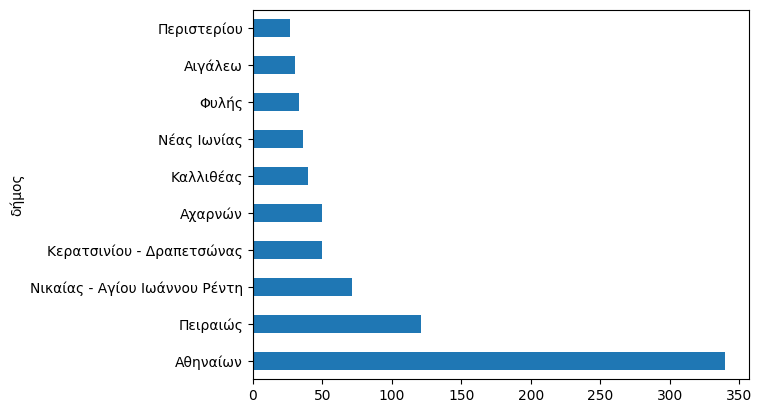

In [14]:
municipality.head(10).plot.barh()

<Axes: ylabel='δήμος'>

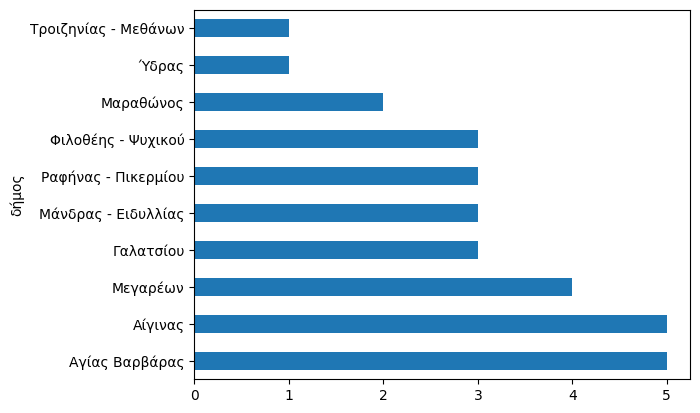

In [15]:
municipality.tail(10).plot.barh()

# Understanding the year ranges of each property's construction, in Attica

In [16]:
# Define year ranges
year_bins = [0, 1950, 1970, 1990, 2000, 2010, 2024]
year_labels = ['Before 1950', '1950-1969', '1970-1989', '1990-1999', '2000-2009', '2010-2024']
df_Attiki['year_range'] = pd.cut(df_Attiki['έτος_κατασκευής'], bins=year_bins, labels=year_labels, right=False)
df_Attiki.head()
df_Attiki.to_csv("Data_Attiki.csv", index=False)

C:\Users\Dafni\AppData\Local\Temp\ipykernel_20032\466292100.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Attiki['year_range'] = pd.cut(df_Attiki['έτος_κατασκευής'], bins=year_bins, labels=year_labels, right=False)


In [17]:
year_range = df_Attiki['year_range'].value_counts().sort_index()

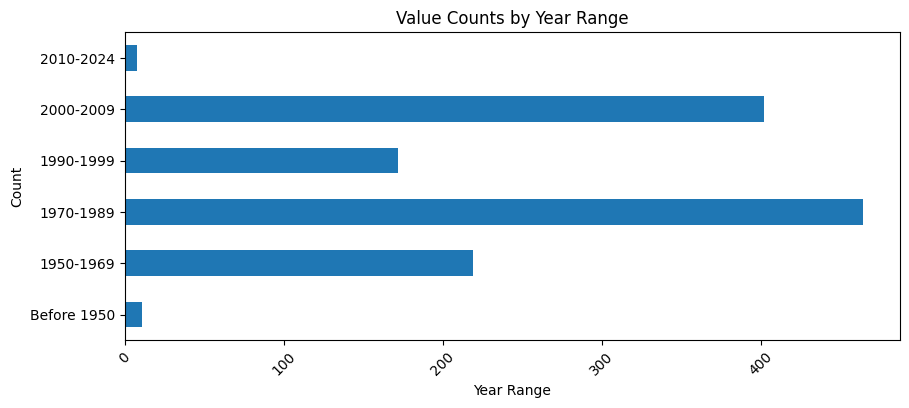

In [18]:
# Plot the data 
plt.figure(figsize=(10, 4))
year_range.plot(kind='barh')
plt.xlabel('Year Range')
plt.ylabel('Count')
plt.title('Value Counts by Year Range')
plt.xticks(rotation=45)
plt.show()

# Understanding the surface ranges of each property's construction, in Attica

In [19]:
# Define surface area ranges
surface_bins = [0, 50, 100, 150, 200, 300, 400, 500, 1000]
surface_labels = ['<50', '50-99', '100-149', '150-199', '200-299', '300-399', '400-499', '500+']
df_Attiki['surface_range'] = pd.cut(df_Attiki['επιφάνεια'], bins=surface_bins, labels=surface_labels, right=False)
df_Attiki.to_csv("Data_Attiki.csv", index=False)

C:\Users\Dafni\AppData\Local\Temp\ipykernel_20032\3141037193.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Attiki['surface_range'] = pd.cut(df_Attiki['επιφάνεια'], bins=surface_bins, labels=surface_labels, right=False)


In [20]:
surface_counts = df_Attiki['surface_range'].value_counts().sort_index()

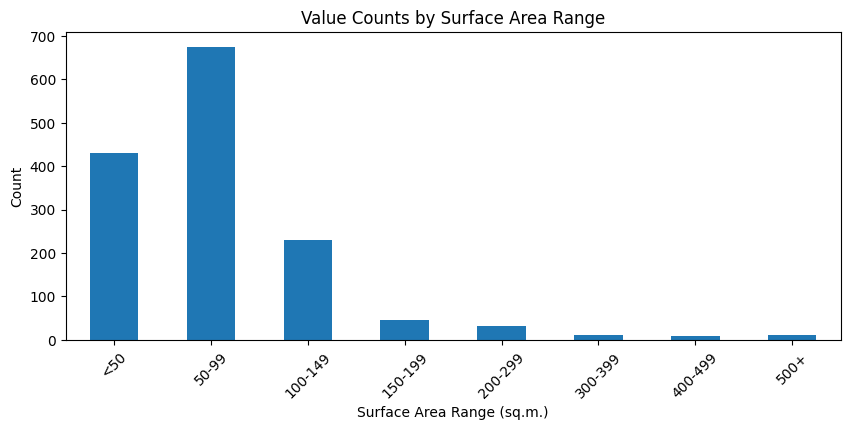

In [21]:
# Plot the results
plt.figure(figsize=(10, 4))
surface_counts.plot(kind='bar')
plt.xlabel('Surface Area Range (sq.m.)')
plt.ylabel('Count')
plt.title('Value Counts by Surface Area Range')
plt.xticks(rotation=45)
plt.show()

# Loking for a correlation between construction year ranges and surface ranges

C:\Users\Dafni\AppData\Local\Temp\ipykernel_26584\2498546125.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_katoikia['year_range'] = pd.cut(df_katoikia['έτος_κατασκευής'], bins=year_bins, labels=year_labels, right=False)
C:\Users\Dafni\AppData\Local\Temp\ipykernel_26584\2498546125.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_katoikia['surface_range'] = pd.cut(df_katoikia['επιφάνεια'], bins=surface_bins, labels=surface_labels, right=False)


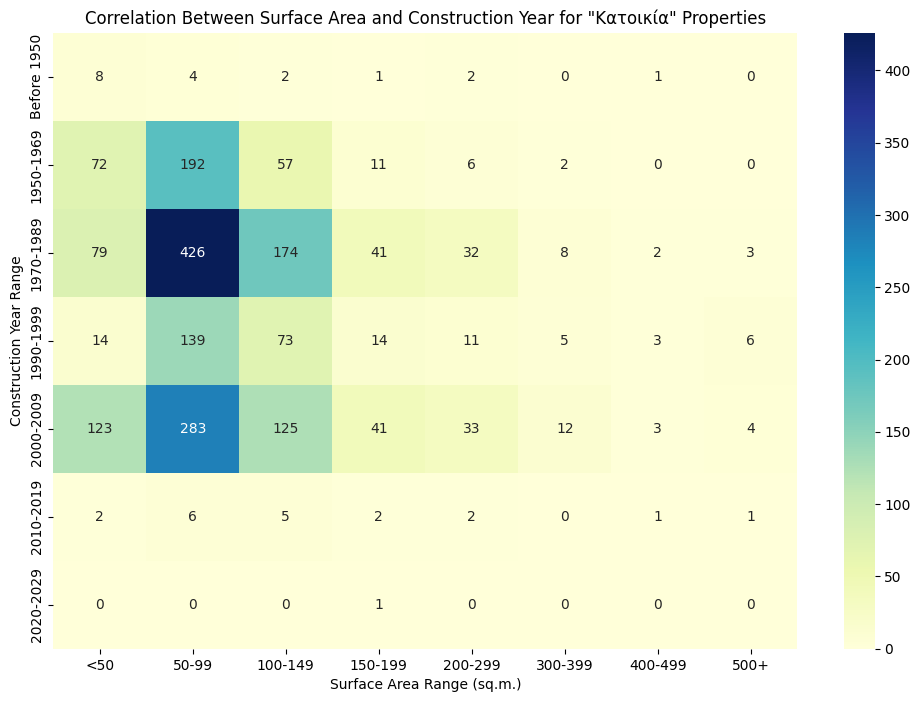

In [5]:
df_katoikia = df[df['τύπος_ακινήτου'] == 'Κατοικία']
# Define year and surface area ranges and categorize data
year_bins = [0, 1950, 1970, 1990, 2000, 2010, 2020, 2030]
year_labels = ['Before 1950', '1950-1969', '1970-1989', '1990-1999', '2000-2009', '2010-2019', '2020-2029']
df_katoikia['year_range'] = pd.cut(df_katoikia['έτος_κατασκευής'], bins=year_bins, labels=year_labels, right=False)

surface_bins = [0, 50, 100, 150, 200, 300, 400, 500, 1000]
surface_labels = ['<50', '50-99', '100-149', '150-199', '200-299', '300-399', '400-499', '500+']
df_katoikia['surface_range'] = pd.cut(df_katoikia['επιφάνεια'], bins=surface_bins, labels=surface_labels, right=False)

# Create a contingency table
contingency_table = pd.crosstab(df_katoikia['year_range'], df_katoikia['surface_range'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Surface Area Range (sq.m.)')
plt.ylabel('Construction Year Range')
plt.title('Correlation Between Surface Area and Construction Year for "Κατοικία" Properties')
plt.show()

# Explore the auctions' status in Attica

In [14]:
status = df_Attiki["κατάσταση_πλειστηριασμού"].value_counts()
status

κατάσταση_πλειστηριασμού
Ματαιωμένος                                     622
Ολοκληρωμένος - Ματαίωση ελλείψει πλειοδοτών    560
Ολοκληρωμένος - Κατακύρωση                      238
Ολοκληρωμένος                                    24
Σε αναστολή                                      12
Name: count, dtype: int64

<Axes: ylabel='κατάσταση_πλειστηριασμού'>

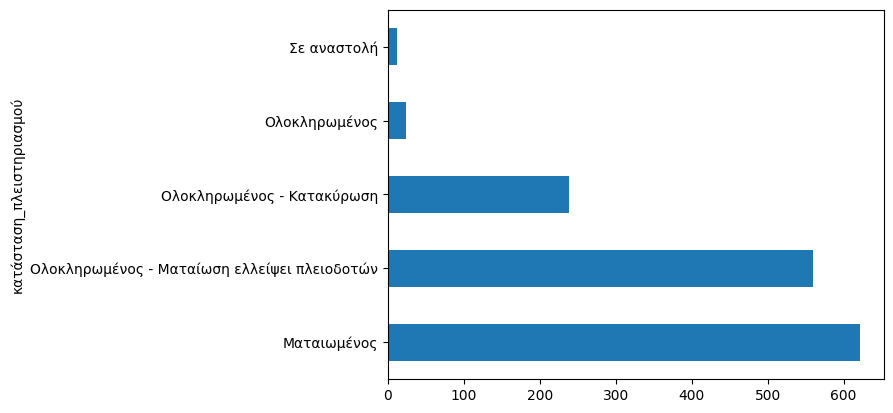

In [15]:
status.plot.barh()

# Looking for a pattern within time

In [ ]:
# Parse the 'ημνία_πλειστηριασμού' column to extract the month
df_Attiki['ημνία_πλειστηριασμού'] = pd.to_datetime(df_Attiki['ημνία_πλειστηριασμού'], format='%d/%m/%Y')
df_Attiki['month'] = df_Attiki['ημνία_πλειστηριασμού'].dt.month

In [ ]:
# Count occurrences of each month
month_counts = df_Attiki['month'].value_counts().sort_index()

C:\Users\Dafni\AppData\Local\Temp\ipykernel_22500\1929771924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Attiki['ημνία_πλειστηριασμού'] = pd.to_datetime(df_Attiki['ημνία_πλειστηριασμού'], format='%d/%m/%Y')
C:\Users\Dafni\AppData\Local\Temp\ipykernel_22500\1929771924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Attiki['month'] = df_Attiki['ημνία_πλειστηριασμού'].dt.month


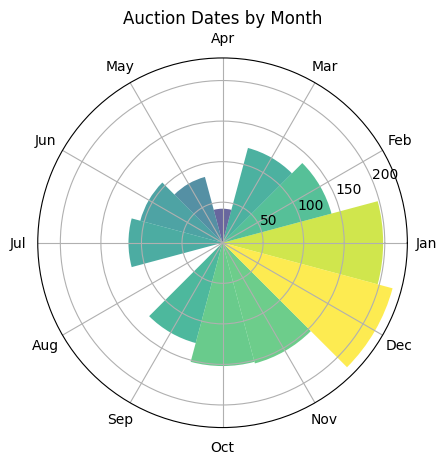

In [18]:
# Prepare data for polar plot
months = np.arange(1, 13)
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
values = month_counts.reindex(months, fill_value=0).values

# Create polar plot
theta = np.linspace(0.0, 2 * np.pi, len(months), endpoint=False)
radii = values
width = 2 * np.pi / len(months)

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=0.0)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.viridis(r / max(radii)))
    bar.set_alpha(0.8)

# Add labels to the bars
ax.set_xticks(theta)
ax.set_xticklabels(month_names)

plt.title('Auction Dates by Month')
plt.show()

C:\Users\Dafni\AppData\Local\Temp\ipykernel_22500\1062187879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Attiki['year'] = df_Attiki['ημνία_πλειστηριασμού'].dt.year


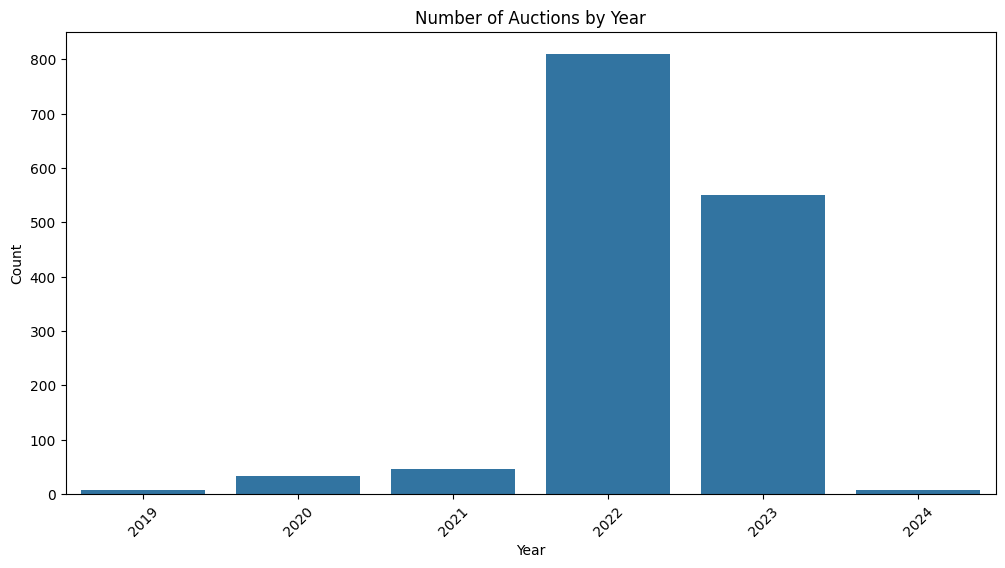

In [19]:
df_Attiki['year'] = df_Attiki['ημνία_πλειστηριασμού'].dt.year
plt.figure(figsize=(12, 6))
sns.countplot(data=df_Attiki, x='year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Auctions by Year')
plt.xticks(rotation=45)
plt.show()

# Look for a pattern in floor numbers in Attica region

In [22]:
df_Attiki['όροφος'].value_counts().sort_values(ascending=False)

όροφος
Ισόγειο       320
1ος           226
2ος           206
Υπόγειο       203
3ος           122
4ος            84
5ος            43
6ος            21
Ημιυπόγειο     12
7ος             7
Πυλωτή          5
Ημιώροφος       2
Δώμα            1
8ος             1
Name: count, dtype: int64

# Look for a pattern in floor numbers inside Residential dataframe for all Greece

In [6]:
df_katoikia['όροφος'].value_counts().sort_values(ascending=False)

όροφος
Ισόγειο       665
1ος           497
2ος           332
3ος           201
4ος           129
5ος            62
6ος            25
Υπόγειο        16
Ημιυπόγειο     14
7ος            11
8ος             2
Δώμα            1
Name: count, dtype: int64

In [7]:
df_katoikia['όροφος'].value_counts(normalize=True).sort_values(ascending=False)

όροφος
Ισόγειο       0.340153
1ος           0.254220
2ος           0.169821
3ος           0.102813
4ος           0.065985
5ος           0.031714
6ος           0.012788
Υπόγειο       0.008184
Ημιυπόγειο    0.007161
7ος           0.005627
8ος           0.001023
Δώμα          0.000512
Name: proportion, dtype: float64

# Correlating price and number of auctions per municipality

In [24]:
# Ensure 'τιμή_εκκίνησης (€)' is numeric
df_Attiki['τιμή_εκκίνησης (€)'] = pd.to_numeric(df_Attiki['τιμή_εκκίνησης (€)'], errors='coerce')

# Group by municipality and aggregate data
municipality_stats = df_Attiki.groupby('δήμος').agg(
    auction_count=('μοναδικός_κωδικός', 'count'),
    avg_price=('τιμή_εκκίνησης (€)', 'mean')
).reset_index()

# Drop municipalities with NaN values in avg_price
municipality_stats = municipality_stats.dropna(subset=['avg_price'])

C:\Users\Dafni\AppData\Local\Temp\ipykernel_20032\3203173857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Attiki['τιμή_εκκίνησης (€)'] = pd.to_numeric(df_Attiki['τιμή_εκκίνησης (€)'], errors='coerce')


In [25]:
# Sort by the number of auctions
top_5_municipalities = municipality_stats.nlargest(5, 'auction_count')
tail_5_municipalities = municipality_stats.nsmallest(5, 'auction_count')

C:\Users\Dafni\AppData\Local\Temp\ipykernel_20032\1921943500.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='δήμος', y='auction_count', data=top_and_tail_municipalities, palette='viridis')


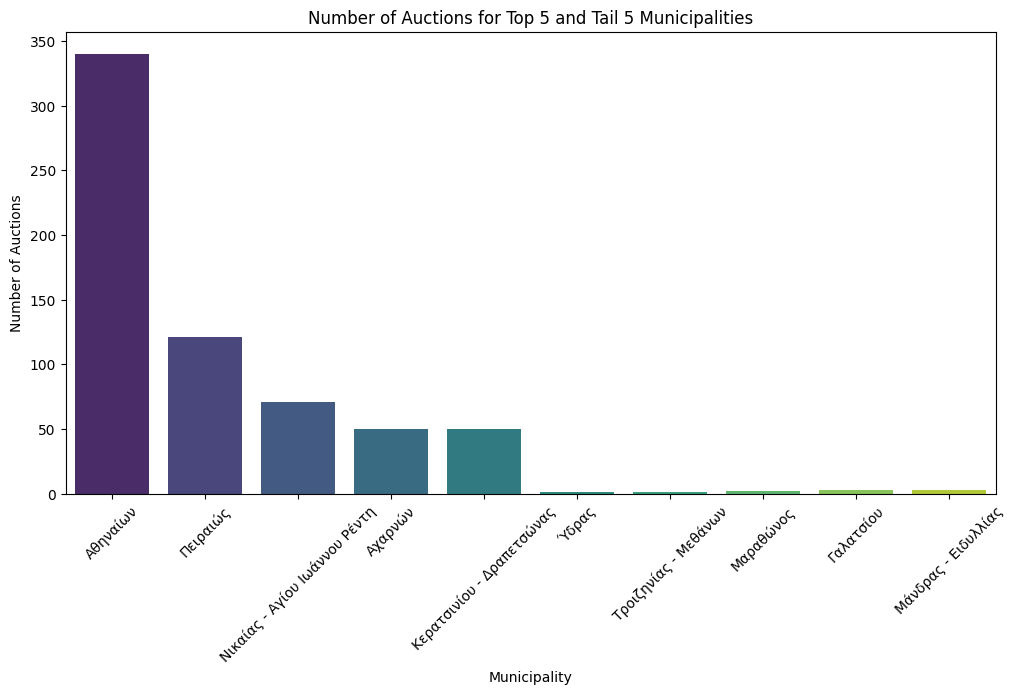

In [26]:
# Combine top and tail municipalities
top_and_tail_municipalities = pd.concat([top_5_municipalities, tail_5_municipalities])

plt.figure(figsize=(12, 6))
sns.barplot(x='δήμος', y='auction_count', data=top_and_tail_municipalities, palette='viridis')
plt.xlabel('Municipality')
plt.ylabel('Number of Auctions')
plt.title('Number of Auctions for Top 5 and Tail 5 Municipalities')
plt.xticks(rotation=45)
plt.show()

# Most frequent property type per municipality

In [28]:
# Group by municipality and property type, then count
type_counts = df_Attiki.groupby(['δήμος', 'τύπος_ακινήτου']).size().reset_index(name='count')

# Find the most frequent property type for each municipality
most_frequent_types = type_counts.loc[type_counts.groupby('δήμος')['count'].idxmax()]

# Merge the results back to df_Attiki
df_Attiki = df_Attiki.merge(most_frequent_types[['δήμος', 'τύπος_ακινήτου']], on='δήμος', how='left', suffixes=('', '_most_frequent'))


df_Attiki.rename(columns={'τύπος_most_frequent': 'most_frequent_type'}, inplace=True)

print(most_frequent_types)
df_Attiki.head()

                  δήμος τύπος_ακινήτου  count
0                 Ύδρας       Κατοικία      1
1               Αίγινας       Κατοικία      3
4        Αγίας Βαρβάρας       Κατοικία      3
8      Αγίας Παρασκευής       Κατοικία      9
13      Αγίου Δημητρίου       Κατοικία     16
..                  ...            ...    ...
179  Φιλοθέης - Ψυχικού       Κατοικία      3
182               Φυλής       Κατοικία     21
187          Χαλανδρίου       Κατοικία     10
189           Χαϊδαρίου       Κατοικία     16
191              Ωρωπού       Κατοικία      4

[62 rows x 3 columns]


,πληροφορίες,ημνία_πλειστηριασμού,μοναδικός_κωδικός,τύπος_ακινήτου,περιφέρεια,δήμος,επιφάνεια,όροφος,έτος_κατασκευής,κατάσταση_πλειστηριασμού,τιμή_εκκίνησης (€),ακρίβεια_τοποθεσίας,latitude,longitude,year_range,surface_range,τύπος_ακινήτου_most_frequent,τύπος_ακινήτου_most_frequent
0,https://www.eauction.gr/Auction/Details/d3dc__...,20/11/2019,qpobGQmNjt,Κατοικία,Αττικής,Πειραιώς,99.5,1ος,1993.0,Ολοκληρωμένος,144327.0,ναι,37.946301,23.667726,1990-1999,50-99,Κατοικία,Κατοικία
1,https://www.eauction.gr/Auction/Details/4i7jb2...,18/12/2019,Oe6tefN9u6-001,Κατοικία,Αττικής,Χαϊδαρίου,84.5,4ος,1985.0,Ματαιωμένος,103323.0,ναι,38.016225,23.649152,1970-1989,50-99,Κατοικία,Κατοικία
2,https://www.eauction.gr/Auction/Details/a6aib7...,18/12/2019,Oe6tefN9u6-002,Αποθήκη,Αττικής,Χαϊδαρίου,3.6,Υπόγειο,1985.0,Ματαιωμένος,3000.0,ναι,38.016225,23.649152,1970-1989,<50,Κατοικία,Κατοικία
3,https://www.eauction.gr/Auction/Details/3cba_6...,18/12/2019,Oe6tefN9u6-003,Κατοικία,Αττικής,Χαϊδαρίου,116.0,4ος,1985.0,Ματαιωμένος,141933.0,ναι,38.016225,23.649152,1970-1989,100-149,Κατοικία,Κατοικία
4,https://www.eauction.gr/Auction/Details/aaa_17...,18/12/2019,Oe6tefN9u6-004,Αποθήκη,Αττικής,Χαϊδαρίου,3.6,Υπόγειο,1985.0,Ματαιωμένος,3000.0,ναι,38.016225,23.649152,1970-1989,<50,Κατοικία,Κατοικία


In [29]:
most_frequent_types["τύπος_ακινήτου"].value_counts()

τύπος_ακινήτου
Κατοικία                 58
Αγροτεμάχιο με κτίσμα     2
Αγροτεμάχιο               1
Αποθήκη                   1
Name: count, dtype: int64

In [ ]:
most_frequent_types.to_csv("Data_Attiki_Freq_Types.csv", index=False)

# Create a dataframe for residential properties only, in Attica

In [30]:
df_Attiki_katoikia = df_Attiki[df_Attiki['τύπος_ακινήτου'] == 'Κατοικία']
df_Attiki_katoikia.head()

,πληροφορίες,ημνία_πλειστηριασμού,μοναδικός_κωδικός,τύπος_ακινήτου,περιφέρεια,δήμος,επιφάνεια,όροφος,έτος_κατασκευής,κατάσταση_πλειστηριασμού,τιμή_εκκίνησης (€),ακρίβεια_τοποθεσίας,latitude,longitude,year_range,surface_range,τύπος_ακινήτου_most_frequent,τύπος_ακινήτου_most_frequent
0,https://www.eauction.gr/Auction/Details/d3dc__...,20/11/2019,qpobGQmNjt,Κατοικία,Αττικής,Πειραιώς,99.50,1ος,1993.0,Ολοκληρωμένος,144327.0,ναι,37.946301,23.667726,1990-1999,50-99,Κατοικία,Κατοικία
1,https://www.eauction.gr/Auction/Details/4i7jb2...,18/12/2019,Oe6tefN9u6-001,Κατοικία,Αττικής,Χαϊδαρίου,84.50,4ος,1985.0,Ματαιωμένος,103323.0,ναι,38.016225,23.649152,1970-1989,50-99,Κατοικία,Κατοικία
3,https://www.eauction.gr/Auction/Details/3cba_6...,18/12/2019,Oe6tefN9u6-003,Κατοικία,Αττικής,Χαϊδαρίου,116.00,4ος,1985.0,Ματαιωμένος,141933.0,ναι,38.016225,23.649152,1970-1989,100-149,Κατοικία,Κατοικία
5,https://www.eauction.gr/Auction/Details/4db3_0...,20/11/2019,F9W0UYPPDP,Κατοικία,Αττικής,Κηφισιάς,165.23,3ος,1975.0,Ολοκληρωμένος,220000.0,ναι,38.087423,23.799744,1970-1989,150-199,Κατοικία,Κατοικία
7,https://www.eauction.gr/Auction/Details/bf5e75...,05/12/2019,r28RFH5IVj,Κατοικία,Αττικής,Αθηναίων,103.00,5ος,1981.0,Ολοκληρωμένος,113000.0,ναι,37.964562,23.743825,1970-1989,100-149,Κατοικία,Κατοικία


In [ ]:
df_Attiki_katoikia.to_csv("Data_Attiki_Katoikia.csv", index=False)

# Explore the floor distribution in residential df

In [31]:
df_Attiki_katoikia['όροφος'].value_counts().sort_values(ascending=False)

όροφος
Ισόγειο       239
1ος           220
2ος           200
3ος           113
4ος            81
5ος            42
6ος            20
Υπόγειο        11
Ημιυπόγειο      9
7ος             7
Δώμα            1
8ος             1
Name: count, dtype: int64

In [32]:
df_Attiki_katoikia.describe()

,επιφάνεια,έτος_κατασκευής,τιμή_εκκίνησης (€),latitude,longitude
count,1076.000000,964.000000,1.075000e+03,1075.000000,1075.000000
mean,93.490009,1982.578838,1.078827e+05,37.985484,23.719618
std,92.195161,16.518312,1.021719e+05,0.062469,0.081666
min,0.000000,1920.000000,6.552000e+02,37.328789,23.340364
25%,59.155000,1970.000000,5.450000e+04,37.956595,23.673084
50%,77.345000,1980.000000,8.300000e+04,37.984868,23.724892
75%,101.000000,1999.000000,1.270000e+05,38.017469,23.753060
max,1633.410000,2015.000000,1.233350e+06,38.321229,24.057968


# Explore the municipality distribution in residential df

In [33]:
df_Attiki_katoikia['δήμος'].value_counts(normalize=True).sort_values(ascending=False).head(10)

δήμος
Αθηναίων                         0.252788
Πειραιώς                         0.086431
Νικαίας - Αγίου Ιωάννου Ρέντη    0.049257
Αχαρνών                          0.031599
Κερατσινίου - Δραπετσώνας        0.031599
Καλλιθέας                        0.026952
Αιγάλεω                          0.022305
Κορυδαλλού                       0.021375
Περιστερίου                      0.021375
Φυλής                            0.019517
Name: proportion, dtype: float64